**ANOMALY DETECTION**


*Anomaly detection relies on reconstruction error. We want the reconstruction error for rare transactions—the ones that are most likely to be fraudulent—to be as high as possible and the reconstruction error for the rest to be as low as possible.*


*For PCA, the reconstruction error will depend largely on the number of principal components we keep and use to reconstruct 
the original transactions. The more principal components we keep, the better PCA will be at learning the underlying structure 
of the original transactions.*


*However, there is a balance. If we keep too many principal components, PCA may too easily reconstruct the original transactions
, so much so that the reconstruction error will be minimal for all of the transactions. If we keep too few principal components,
PCA may not be able to reconstruct any of the original transactions well enough—not even the normal, nonfraudulent transactions.*

**CREDIT CARD FRAUD DETECTION**

**IMPORT RELEVANT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline
import os, time
import matplotlib as mpl

**READ THE DATASET**

In [2]:
current_path = os.getcwd()

In [3]:
file = "C:\\Users\\User\Desktop\\Machine Learning\\Machine-Learning-Models\\Unsupervised Learning\\Dimensionality Reduction\\Anomaly Detection\\Credit Card Fraud Detection\\archive\\creditcard.csv"

In [4]:
df = pd.read_csv(file)

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**PERFORM EXPLORATORY DATA ANALYSIS**

In [6]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
print("Number of fraudulent transactions:", df['Class'].sum())

Number of fraudulent transactions: 492


**PERFORM FEATURE AND LABELS SPLIT**

In [10]:
X = df.copy().drop(['Class'],axis=1)

In [11]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [12]:
y = df['Class'].copy()

In [13]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

**SCALE THE DATASET**

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
featuresToScale = X.columns

In [16]:
scaler = StandardScaler(copy=True)

In [17]:
X.loc[:,featuresToScale] = scaler.fit_transform(X[featuresToScale])

**OBTAIN THE TRAIN TEST SPLIT**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101, stratify=y)

**CREATE THE PCA ANOMALY DETECTION MODEL**

*Let’s search for the right number of principal components to keep to build a good fraud detection system.*

*If we use PCA to generate the same number of principal components as the number of original features, we will be able
to perform anomaly detection.*


*When the number of principal components equals the number of original dimensions, PCA captures nearly 100% of the variance/information 
in the data as it generates the principal components. Therefore, when PCA reconstructs the transactions from the principal components, it 
will have too little reconstruction error for all the transactions, fraudulent or otherwise. We will not be able to differentiate between 
rare transactions and normal ones— in other words, anomaly detection will be poor.*


*To highlight this, let’s apply PCA to generate the same number of principal components as the number of original features (30 for our credit 
card transactions dataset).*


*In the context of our credit card transactions dataset, the algorithms will have
the largest reconstruction error on those transactions that are hardest to
model—in other words, those that occur the least often and are the most
anomalous. Since fraud is rare and presumably different than normal
transactions, the fraudulent transactions should exhibit the largest
reconstruction error. So let’s define the anomaly score as the reconstruction
error. The reconstruction error for each transaction is the sum of the squared
differences between the original feature matrix and the reconstructed matrix
using the dimensionality reduction algorithm. We will scale the sum of the
squared differences by the max-min range of the sum of the squared
differences for the entire dataset, so that all the reconstruction errors are
within a zero to one range.
The transactions that have the largest sum of squared differences will have an
error close to one, while those that have the smallest sum of squared
differences will have an error close to zero.*

**Reconstruct the original transactions from the principal components we generate**

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca_model = PCA(n_components=30, whiten=False, random_state=101)

In [23]:
X_train_PCA = pca_model.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=X_train.index)

In [24]:
X_train_PCA

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
268384,-0.365238,1.909194,0.391406,-0.250344,-0.744602,-0.302125,-0.332635,1.528694,0.957307,-0.796543,...,-0.658460,-0.340622,0.763549,0.731023,0.381915,0.095535,-0.030866,-0.159890,-0.117729,-0.070312
192363,-0.392808,1.193865,0.205322,0.138710,-0.411076,-0.319273,0.195886,1.672701,-0.362334,-0.935584,...,0.453954,0.359344,0.414704,0.740363,-0.021392,-0.237085,-0.287893,0.462427,0.166114,0.027359
33870,0.110200,-0.745140,0.179164,0.260844,0.770146,-1.129289,-0.396740,-0.177616,-0.063420,-0.573195,...,1.573829,0.254079,-0.856455,-0.072586,-0.289911,0.202762,-0.222980,-0.464655,0.962828,0.008436
252538,-0.677117,1.814809,-0.610597,-0.060217,0.612160,0.350168,-0.075116,0.830450,-1.765045,-2.582292,...,0.696807,-0.179553,0.776150,1.437490,-0.256077,0.281634,0.095877,-0.900030,0.021713,-0.049523
211816,-0.351134,1.050931,0.109103,-0.131086,0.084628,0.655949,0.509755,-1.473865,-0.424530,1.567481,...,-1.085529,-0.447218,-0.528742,-0.432339,0.476128,0.367715,-0.055327,-0.022482,-0.225877,0.013088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167123,5.194912,1.347499,-1.778569,0.406008,-0.388468,0.122821,-0.699797,1.248429,0.212742,1.667814,...,-0.651636,-1.143387,-0.062259,0.354357,-0.609151,0.874914,0.270969,-1.261283,0.391503,-0.196816
47862,-0.226082,-2.085363,0.169541,-0.216742,-0.213472,-0.430860,-0.943444,1.392681,-0.826404,-2.218008,...,0.050586,-1.118200,1.023319,0.292221,-0.324825,-0.006240,0.012720,-0.282743,-0.549529,0.034562
57567,-0.234094,-0.666819,0.011467,0.106848,0.611209,0.091302,-0.281715,-0.501335,-0.038555,0.023648,...,1.195322,0.465393,-0.419443,-1.009470,0.312910,0.162678,-0.259836,-0.366243,0.744815,0.026490
102906,-0.372928,-1.151033,0.301745,0.278451,0.684610,0.015268,-0.041250,-0.429662,-0.446222,0.819483,...,0.992413,-0.432570,0.983877,-0.583397,-0.370838,0.089407,-0.112267,-0.146277,-0.359285,0.053439


In [25]:
X_train_PCA_inverse = pca_model.inverse_transform(X_train_PCA)
X_train_PCA_inverse = pd.DataFrame(data=X_train_PCA_inverse, index=X_train.index)

In [26]:
X_train_PCA_inverse

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
268384,1.439754,-0.211007,0.463850,-0.131146,-0.034159,0.003859,-0.313265,0.402831,0.079181,0.679639,...,-0.376655,0.293806,1.424601,-0.193918,1.897973,-0.013749,1.403482,-1.221559,-0.892297,-0.156324
192363,0.733640,1.118002,-0.326356,-1.425507,-0.573308,-0.106314,-1.411933,0.291145,-0.456862,-1.126310,...,-0.159157,0.773081,2.265852,-0.262674,0.944779,1.182164,0.524792,-0.252477,-0.297913,-0.273268
33870,-1.208659,-0.508715,0.481079,0.369155,0.531833,0.711642,1.124543,0.751372,-0.008479,0.024358,...,0.342454,-0.268435,0.107153,-0.647279,-2.780648,0.261038,-0.371616,0.295998,0.398536,0.050577
252538,1.285337,-0.523018,0.477718,-0.991527,-0.772188,1.960350,0.435183,1.080927,-0.070445,-0.479067,...,-0.617933,0.777570,2.332832,-0.687819,-1.074615,-0.098601,0.004320,-1.387136,1.154279,-0.348512
211816,0.921687,0.973888,-0.435029,0.073089,0.269857,-0.726694,0.171218,-0.958064,0.230924,1.731502,...,-0.246425,0.325165,1.085104,0.347826,0.972216,-0.725959,-0.605723,0.152181,-0.046185,-0.229369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167123,0.498697,0.005545,-1.980002,-2.140223,0.956432,-0.436822,-0.562492,1.380625,-0.437296,0.387341,...,2.515663,0.535792,-1.710134,-1.122300,1.101578,-0.944029,0.461538,-0.707911,0.456900,3.944833
47862,-1.082795,-0.498632,0.233225,1.334365,-0.094450,0.496571,1.395403,0.125354,0.658043,-0.367457,...,-0.137908,-0.080441,-0.078325,-0.031281,-1.694604,-0.204617,0.677245,0.184995,0.128227,-0.233487
57567,-0.986540,-0.308972,0.600047,0.544529,0.496710,0.508464,-0.259823,0.699687,-0.157674,-0.538950,...,0.311502,0.111907,0.605095,-0.228701,-0.672510,-0.029743,-0.576725,0.739618,0.718687,-0.209298
102906,-0.555800,-0.362222,0.650132,1.018167,-0.098441,-0.179798,-0.557850,0.414050,0.120657,-0.276123,...,0.194253,-0.283745,-0.768914,0.056856,0.793418,-0.448370,0.104766,0.900275,0.509541,-0.346113


**VISUALIZE THE SEPERATION OF TRANSACTIONS USING THE FIRST TWO PRINCIPAL COMPONENTS OF PCA**

In [27]:
def scatter_plot(feature_dataframe, label_dataframe, algorithm_name):
    temp_dataframe = pd.DataFrame(data=feature_dataframe.loc[:, 0:1], index=feature_dataframe.index)
    temp_dataframe = pd.concat((temp_dataframe,label_dataframe), axis=1, join='inner')
    temp_dataframe.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data= temp_dataframe, fit_reg=False)
    
    ax = plt.gca()
    ax.set_title(f'Seperation of Observations using {algorithm_name}')

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


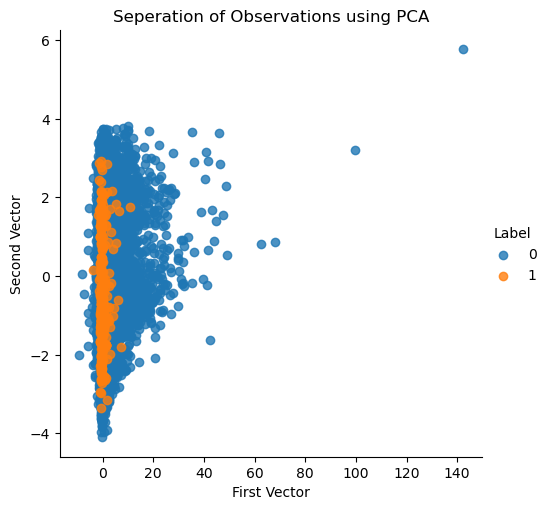

In [28]:
scatter_plot(X_train_PCA, y_train, 'PCA')

**CALCULATE THE PRECISION RECALL AND THE ROC CURVE**

In [29]:
from sklearn.metrics import precision_recall_curve, average_precision_score 
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc

In [30]:
def anomalyScores(originalDF, reducedDF):
    loss = np.sum((np.array(originalDF)-np.array(reducedDF))**2, axis=1)
    loss = pd.Series(data=loss,index=originalDF.index)
    loss = (loss-np.min(loss))/(np.max(loss)-np.min(loss))
    return loss

In [31]:
# Plot results
def plotResults(trueLabels, anomalyScores, returnPreds = False):
    preds = pd.concat([trueLabels, anomalyScores], axis=1)
    preds.columns = ['trueLabel', 'anomalyScore']
    precision, recall, thresholds = precision_recall_curve(preds['trueLabel'],preds['anomalyScore'])
    average_precision = average_precision_score(preds['trueLabel'],preds['anomalyScore'])
    
    plt.step(recall, precision, color='k', alpha=0.7, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    
    plt.title('Precision-Recall curve: Average Precision = \
    {0:0.2f}'.format(average_precision))

    fpr, tpr, thresholds = roc_curve(preds['trueLabel'], \
                                     preds['anomalyScore'])
    areaUnderROC = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic: Area under the curve = {0:0.2f}'.format(areaUnderROC))
    plt.legend(loc="lower right")
    plt.show()
    
    if returnPreds==True:
        return preds

In [32]:
anomaly_score_PCA = anomalyScores(originalDF=X_train, reducedDF=X_train_PCA_inverse)

In [33]:
anomaly_score_PCA

268384    1.000000
192363    0.352021
33870     0.450746
252538    0.361725
211816    0.058410
            ...   
167123    0.001644
47862     0.002057
57567     0.000498
102906    0.000580
252213    0.000400
Length: 190820, dtype: float64

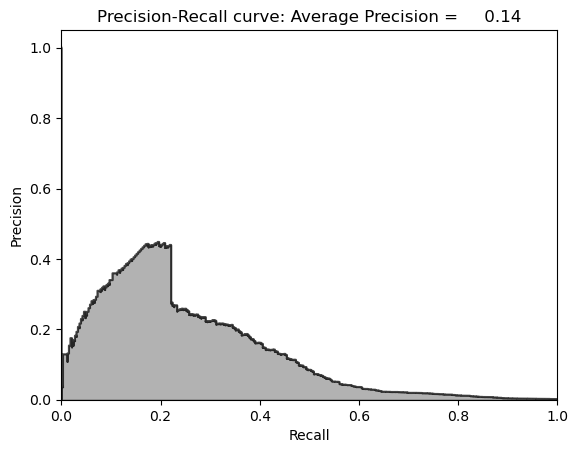

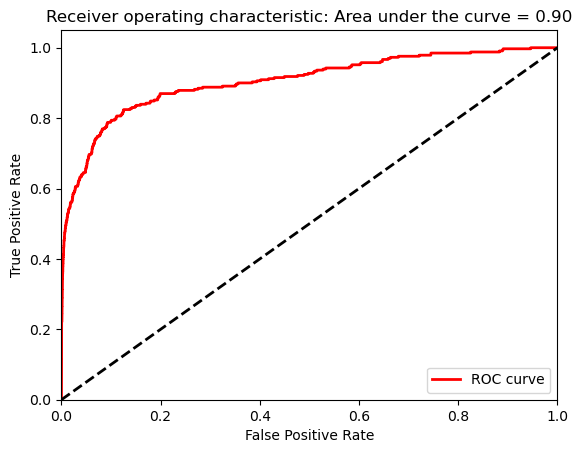

In [34]:
pred = plotResults(y_train, anomaly_score_PCA, True)

*With an average precision of 0.14, this is a poor fraud detection solution. It catches very little of the fraud.*

**SEARCH FOR THE OPTIMAL NUMBER OF PRINCIPAL COMPONENT**

In [104]:
pca = PCA(n_components=23, whiten=False, random_state=101)

X_trainPCA = pca.fit_transform(X_train)
X_trainPCA = pd.DataFrame(data=X_trainPCA, index=X_train.index)

X_trainPCA_inverse = pca.inverse_transform(X_trainPCA)
X_trainPCA_inverse = pd.DataFrame(data=X_trainPCA_inverse, index=X_train.index)


C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


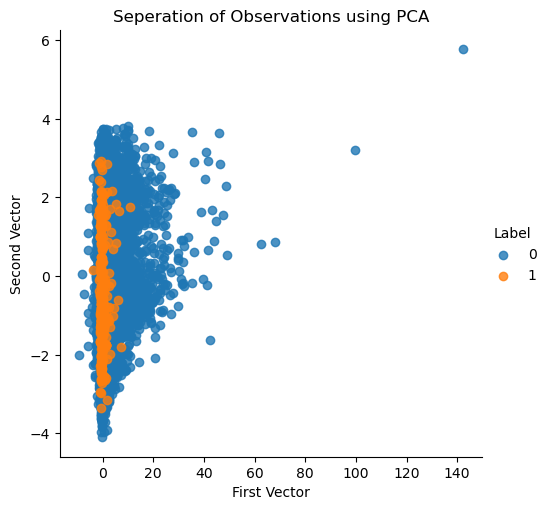

In [105]:
scatter_plot(X_trainPCA, y_train, "PCA")

In [106]:
anomaly_scorePCA = anomalyScores(X_train, X_trainPCA_inverse)

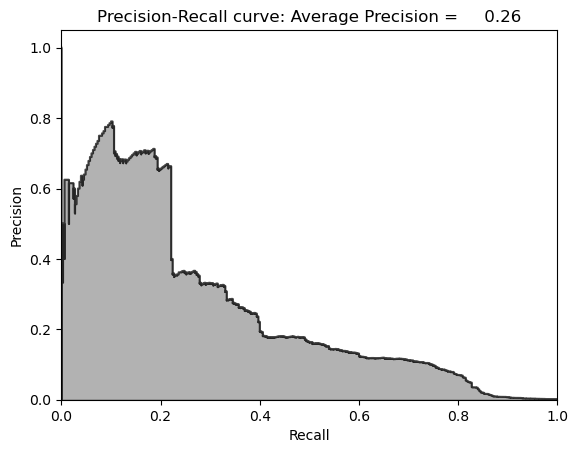

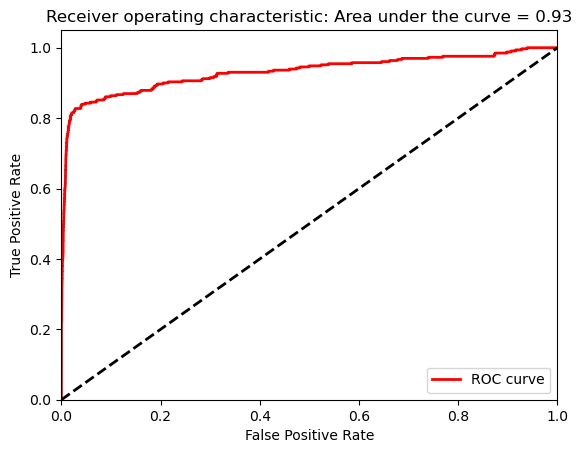

In [107]:
prediction = plotResults(y_train, anomaly_scorePCA, True)

In [108]:
# Analyze results
prediction.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = prediction[:cutoff]
print("Precision: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.31
Recall:  0.33
Fraud Caught out of 330 Cases: 109


*We are able to catch 33% of the fraud with 31% precision.
This is not a very impressive result*

**SPARSE PCA ANOMALY DETECTION**

In [113]:
from sklearn.decomposition import SparsePCA

In [121]:
n_components = 23
alpha = 0.0001
random_state = 2018
n_jobs = -1

In [122]:
sparsePCA = SparsePCA(n_components=n_components, alpha=alpha, random_state=random_state, n_jobs=n_jobs)

In [123]:
sparsePCA.fit(X_train.loc[:,:])

SparsePCA(alpha=0.0001, n_components=23, n_jobs=-1, random_state=2018)

In [124]:
X_train_sparsePCA = sparsePCA.transform(X_train)
X_train_sparsePCA = pd.DataFrame(data=X_train_sparsePCA, index=X_train.index)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


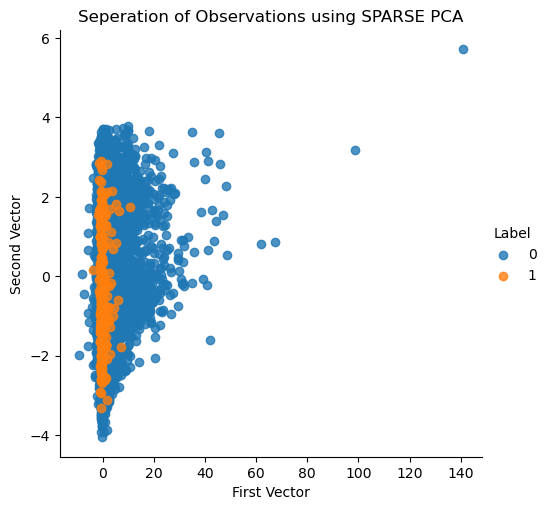

In [125]:
scatter_plot(X_train_sparsePCA, y_train, "SPARSE PCA")

In [126]:
X_train_sparsePCA_inverse = np.array(X_train_sparsePCA).dot(sparsePCA.components_) + np.array(X_train.mean(axis=0))
X_train_sparsePCA_inverse = pd.DataFrame(data=X_train_sparsePCA_inverse, index=X_train.index)

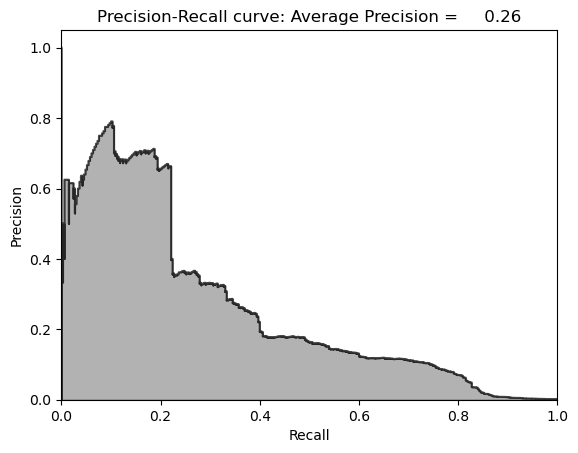

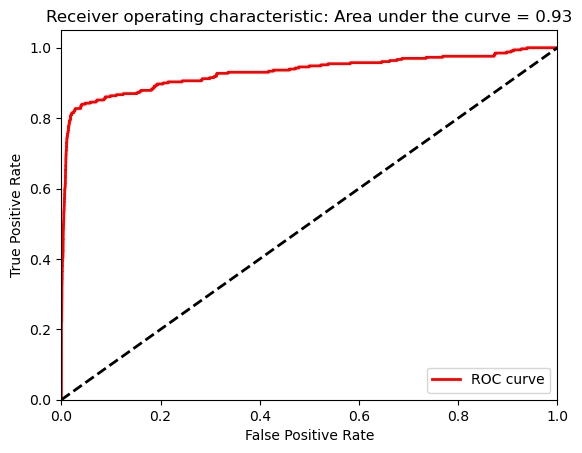

In [127]:
anomalyScoresSparsePCA = anomalyScores(X_train, X_train_sparsePCA_inverse)
preds = plotResults(y_train, anomalyScoresSparsePCA, True)

**KERNEL PCA ANOMALY DETECTION**

In [128]:
from sklearn.decomposition import KernelPCA

In [132]:
n_components = 23
kernel = 'rbf'
gamma = None
fit_inverse_transform = True
random_state = 101
n_jobs = 1

kernelPCA = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma, fit_inverse_transform=fit_inverse_transform, n_jobs=n_jobs, random_state=random_state)

kernelPCA.fit(X_train.iloc[:2000])

X_train_kernelPCA = kernelPCA.transform(X_train)
X_train_kernelPCA = pd.DataFrame(data=X_train_kernelPCA, index=X_train.index)

X_train_kernelPCA_inverse = kernelPCA.inverse_transform(X_train_kernelPCA)
X_train_kernelPCA_inverse = pd.DataFrame(data=X_train_kernelPCA_inverse, index=X_train.index)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


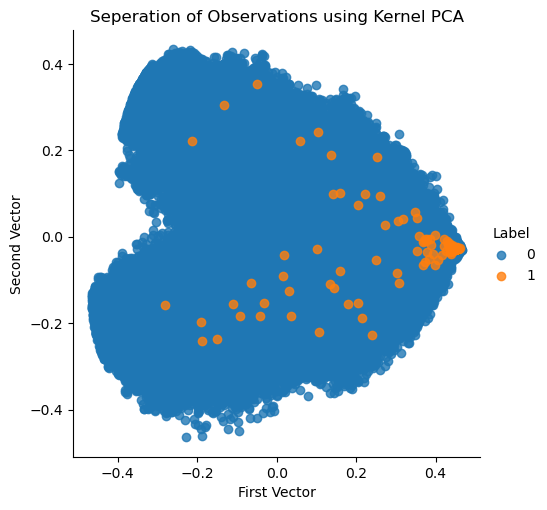

In [133]:
scatter_plot(X_train_kernelPCA, y_train, "Kernel PCA")

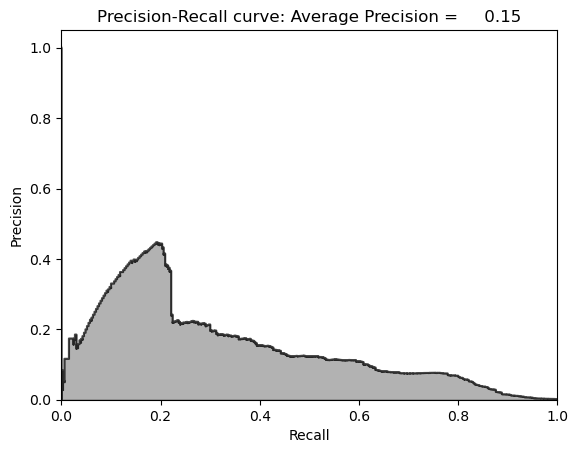

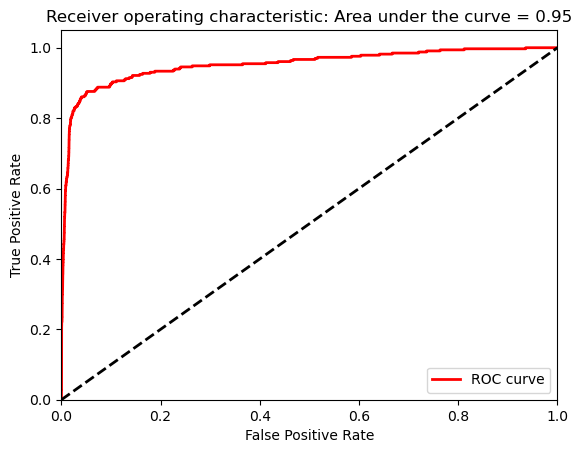

In [134]:
anomalyScoreskernelPCA = anomalyScores(X_train, X_train_kernelPCA_inverse)
preds = plotResults(y_train, anomalyScoreskernelPCA, True)

**GAUSSIAN RANDOM PROJECTION ANOMALY DETECTION**

In [135]:
from sklearn.random_projection import GaussianRandomProjection

In [149]:
n_components = 23
eps = 0.0001
random_state = 101

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


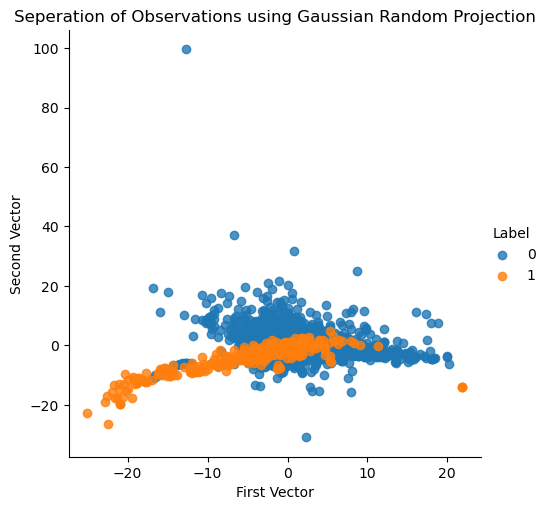

In [150]:
GRP = GaussianRandomProjection(n_components=n_components, eps=eps, random_state=random_state)

X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=X_train.index)

X_train_GRPPCA_inverse = GRP.inverse_transform(X_train_GRP)
X_train_GRPPCA_inverse = pd.DataFrame(data=X_train_GRPPCA_inverse, index=X_train.index)

scatter_plot(X_train_GRP, y_train, "Gaussian Random Projection")

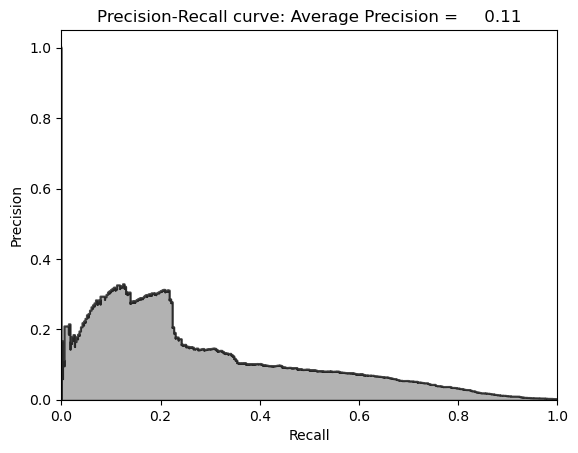

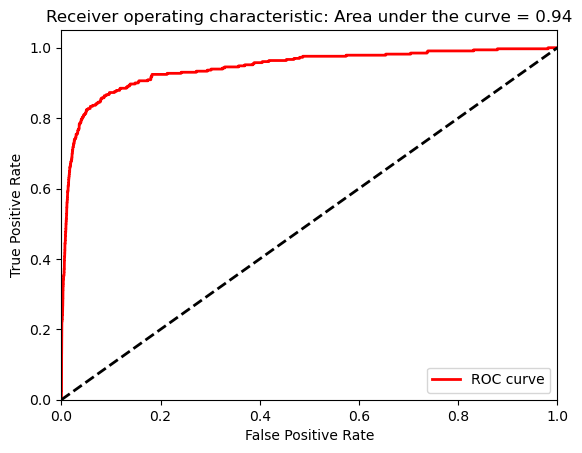

In [151]:
anomalyScoresGRPPCA = anomalyScores(X_train, X_train_GRPPCA_inverse)
preds = plotResults(y_train, anomalyScoresGRPPCA, True)

In [153]:
# Analyze results
pred.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = pred[:cutoff]
print("Precision: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())

Precision:  0.24
Recall:  0.26
Fraud Caught out of 330 Cases: 85


**DICTIONARY LEARNING ANOMALY DETECTION**

In [154]:
from sklearn.decomposition import MiniBatchDictionaryLearning

In [160]:
n_components = 23
alpha = 1
batch_size = 200
n_iter = 10
random_state = 101

miniBatchDictLearning = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter, random_state=random_state)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\decomposition\_dict_learning.py:2350: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
C:\Users\User\anaconda3\envs\tf\lib\site-packages\sklearn\decomposition\_dict_learning.py:2350: FutureWarning: 'n_iter' is deprecated in version 1.1 and will be removed in version 1.4. Use 'max_iter' and let 'n_iter' to its default value instead. 'n_iter' is also ignored if 'max_iter' is specified.
  warnings.warn(
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

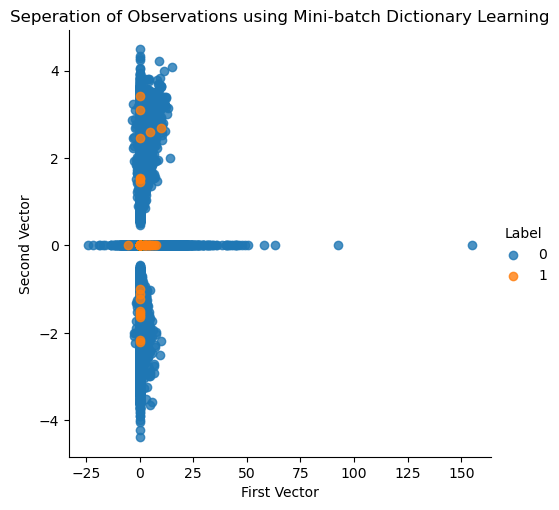

In [161]:
miniBatchDictLearning.fit(X_train)
X_train_miniBatchDictLearning = miniBatchDictLearning.fit_transform(X_train)
X_train_miniBatchDictLearning = pd.DataFrame(data=X_train_miniBatchDictLearning, index=X_train.index)
scatter_plot(X_train_miniBatchDictLearning, y_train, "Mini-batch Dictionary Learning")

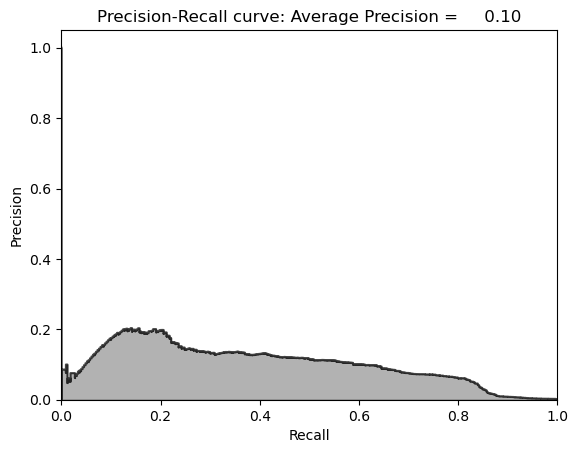

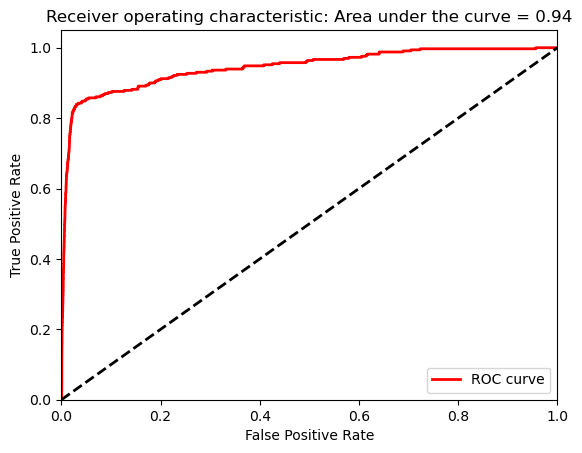

In [162]:
X_train_miniBatchDictLearning_inverse = np.array(X_train_miniBatchDictLearning).dot(miniBatchDictLearning.components_)

X_train_miniBatchDictLearning_inverse = pd.DataFrame(data=X_train_miniBatchDictLearning_inverse, index=X_train.index)

anomalyScoresMiniBatchDictLearning = anomalyScores(X_train, X_train_miniBatchDictLearning_inverse)
preds = plotResults(y_train, anomalyScoresMiniBatchDictLearning, True)

**ICA ANOMALY DETECTION**

In [163]:
from sklearn.decomposition import FastICA

In [184]:
n_components = 22
algorithm = 'parallel'
whiten = 'arbitrary-variance'
max_iter = 200
random_state = 101

In [185]:
fastICA = FastICA(n_components=n_components, algorithm=algorithm, whiten=whiten, max_iter=max_iter, random_state=random_state)

In [186]:
X_train_fastICA = fastICA.fit_transform(X_train)
X_train_fastICA = pd.DataFrame(data=X_train_fastICA, index=X_train.index)

X_train_fastICA_inverse = fastICA.inverse_transform(X_train_fastICA)
X_train_fastICA_inverse = pd.DataFrame(data=X_train_fastICA_inverse, index=X_train.index)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


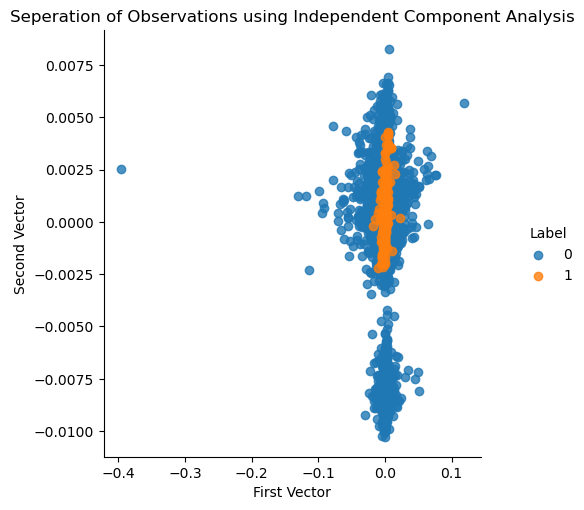

In [187]:
scatter_plot(X_train_fastICA, y_train, "Independent Component Analysis")

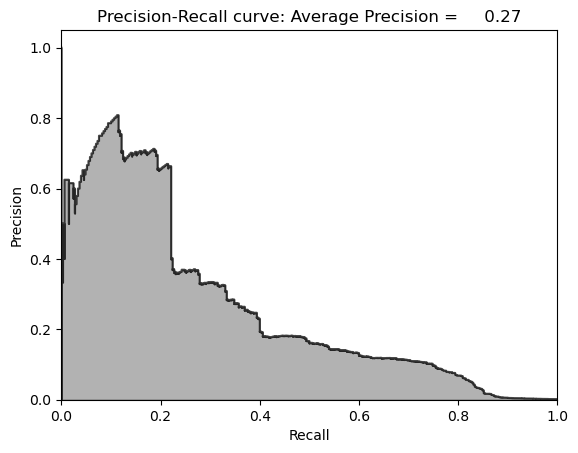

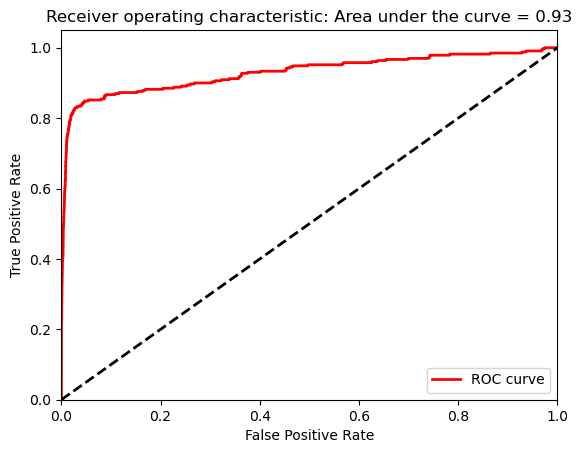

In [188]:
anomalyScoresFastICA = anomalyScores(X_train, X_train_fastICA_inverse)
plotResults(y_train, anomalyScoresFastICA)

**Fraud Detection on the Test Set**

**PCA ANOMALY DETECTION**

In [189]:
X_test_PCA = pca.transform(X_test)
X_test_PCA = pd.DataFrame(data=X_test_PCA, index=X_test.index)

X_test_PCA_inverse = pca.inverse_transform(X_test_PCA)
X_test_PCA_inverse = pd.DataFrame(data=X_test_PCA_inverse, index=X_test.index)

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


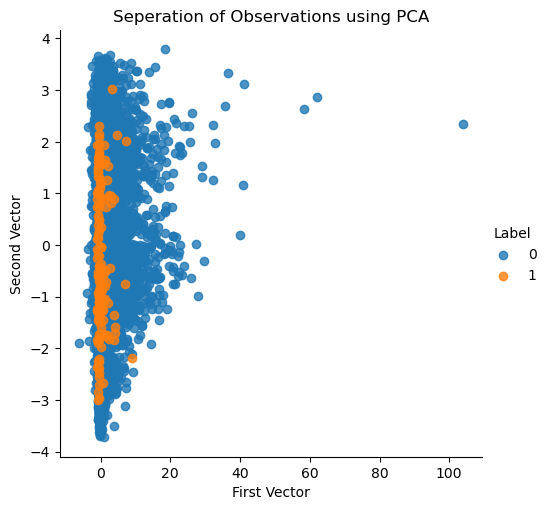

In [193]:
scatter_plot(X_test_PCA, y_test, "PCA")

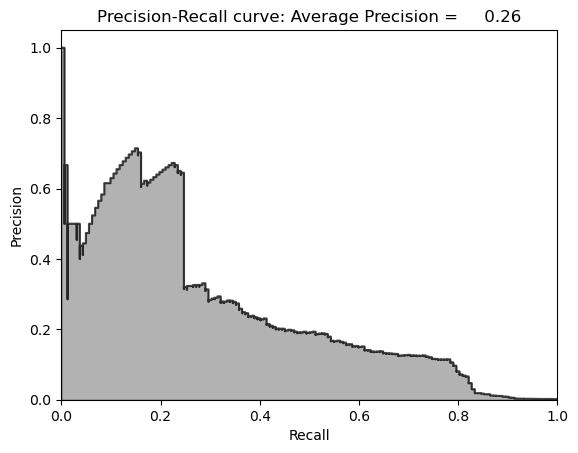

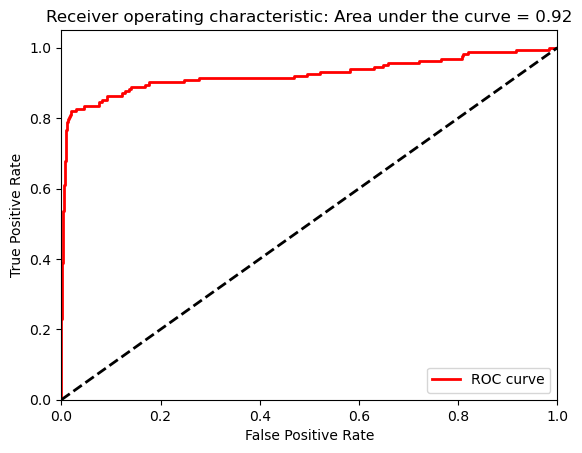

In [195]:
anomalyScoresPCA = anomalyScores(X_test, X_test_PCA_inverse)
predcns = plotResults(y_test, anomalyScoresPCA, True)

In [ ]:
# Analyze results
predcns.sort_values(by="anomalyScore",ascending=False,inplace=True)
cutoff = 350
predsTop = pred[:cutoff]
print("Precision: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/cutoff,2))
print("Recall: ",np.round(predsTop.anomalyScore[predsTop.trueLabel==1].count()/y_train.sum(),2))
print("Fraud Caught out of 330 Cases:", predsTop.trueLabel.sum())